In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''
def load_iris_data():
    iris = load_iris()
    return iris

In [9]:
sample = load_iris_data()

In [4]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''
def check_data(iris):
    data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
    data = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].head(5)
    return data

In [43]:
checkdata = check_data(sample)
print(checkdata)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [50]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

def linear_train_data(iris):
    X = iris.data[:, 1:]
    y = iris.data[:, 0]
    return X, y



In [51]:
X,y = linear_train_data(sample)
print(X,y)

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

In [17]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''
def logistic_train_data(dataset):
    X = dataset.data[:, 1:]
    y = np.where(dataset.target <= 1, 0, 1)
    mask = (y == 0) | (y == 1)
    X = X[mask]
    y = y[mask]
    return X, y

In [52]:
X,y = logistic_train_data(sample)
print(X,y)

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

In [20]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = split_data(X,y)

In [22]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [26]:
linmodel = train_linear_regression(X_train,y_train)

In [53]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [54]:
logmodel = train_logistic_regression(X_train,y_train)

In [55]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''
def predict(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [56]:
y_pred = predict(logmodel,X_test)

In [36]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''
def plot_actual_vs_predicted(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_test, y_pred)
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    return fig

Figure(800x600)


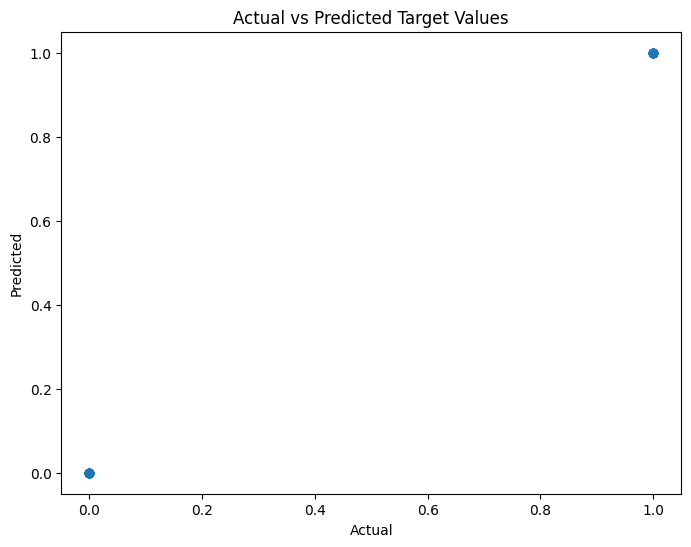

In [57]:
fig = plot_actual_vs_predicted(y_test,y_pred)
print(fig)

In [38]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [58]:
mse = evaluate_model(y_test,y_pred)
print(mse)

0.0
